# Continuous Control using Proximal Policy Optimization

---

In this notebook, you will train an a double-jointed arm to move to a target location using 
Proximal Policy Optimization.

Make sure, you followed the installation instructions which you can find in the [Readme](./Readme.md) of this repo.


First define some utility functions and import necessary packages.

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

def plot(scores=[], ylabel="Scores", xlabel="Episode #", title="", text="", save=False):
    fig, ax = plt.subplots()

    for score in scores:
        ax.plot(np.arange(len(score)), score)
    xlabel = "\n".join([xlabel, text])
    ax.set(xlabel=xlabel, ylabel=ylabel,
           title=title)
    ax.grid()
    fig.tight_layout()
    if save is True:
        fig.savefig(f"plot_{datetime.datetime.now().isoformat().replace(':', '')}.png")
    plt.show()


In [3]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [7]:
env = UnityEnvironment(file_name='reacher20/reacher')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [10]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(f"Brain name: {brain_name}")

Brain name: ReacherBrain


### 2. Examine the State and Action Spaces

In this environment, twenty double-jointed arms can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [11]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, we will control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.
At the end, you will get a plot of all agents' scores.

Mean score over last 100 steps  8.999999798834324e-05  steps:  1001


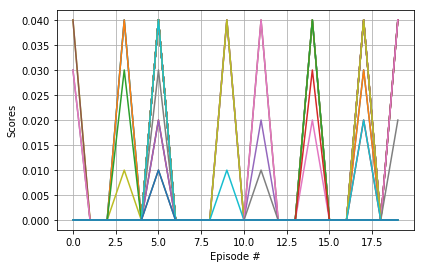

Total score (averaged over agents) this episode: 0.00013786213478067896


In [20]:
from collections import deque

env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
scores_window = deque(maxlen=100)  # last 100 scores
scores = []
steps=0
while True:
    steps += 1
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores.append(env_info.rewards)          # update the score (for each agent)
    scores_window.append(env_info.rewards)                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print("Mean score over last 100 steps ", np.mean(scores_window), " steps: ", steps)
        plot(scores)
        break
    
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [33]:
env.close()

## Traing the agents using Proximal Policy Optimization

### PPO in a nutshell

1. First, collect some trajectories based on some policy $\pi_\theta$, and initialize theta prime $\theta'=\theta$ 

2. Next, compute the gradient of the clipped surrogate function using the trajectories
3. Update $\theta'$ using gradient ascent $\theta'\leftarrow\theta' +\alpha \nabla_{\theta'}L_{\rm sur}^{\rm clip}(\theta', \theta)$ 
4. Then we repeat step 2-3 without generating new trajectories. Typically, step 2-3 are only repeated a few times
5. Set $\theta=\theta'$, go back to step 1 to generate more trajectories, repeat.



... but first let's setup our Actor Critic Network.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

Define the network. It consists of two networks. One Actor, one critic.

In [3]:
class ActorCritic(nn.Module):
    def __init__(self, num_inputs, num_outputs, hidden_size = 256, std=0.0):
        super(ActorCritic, self).__init__()

        self.critic = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

        self.actor = nn.Sequential(
            nn.Linear(num_inputs, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_outputs),
            nn.Tanh(),
        )
        self.log_std = nn.Parameter(torch.ones(1, num_outputs) * std)

    def forward(self, x):
        value = self.critic(x)
        mu = self.actor(x)
        std = self.log_std.exp().expand_as(mu)
        # std   = self.log_std.exp().squeeze(0).expand_as(mu)
        dist = torch.distributions.Normal(mu, std)
        return dist, value


...the function to sample trajectories

In [4]:
def sample(mini_batch_size, states, actions, log_probs, returns, advantage):
    batch_size = states.size(0)
    for _ in range(batch_size // mini_batch_size):
        rand_ids = np.random.randint(0, batch_size, mini_batch_size)
        yield states[rand_ids, :], actions[rand_ids, :], log_probs[rand_ids, :], returns[rand_ids, :], advantage[rand_ids, :]

Compute the gradient of the clipped surrogate function using the trajectories

Update $\theta'$ using gradient ascent $\theta'\leftarrow\theta' +\alpha \nabla_{\theta'}L_{\rm sur}^{\rm clip}(\theta', \theta)$

Repeat *ppo_epochs* times. 


In [5]:
def learn(ppo_epochs, mini_batch_size, states, actions, log_probs, returns, advantages, model, optimizer,
               clip_param=0.2, clip_gradients=False):
    for _ in range(ppo_epochs):
        for state, action, old_log_probs, return_, advantage in sample(mini_batch_size, states, actions, log_probs,
                                                                         returns, advantages):
            dist, value = model(state)
            entropy = dist.entropy().mean()
            new_log_probs = dist.log_prob(action)
            new_log_probs = torch.sum(new_log_probs, dim=1, keepdim=True)

            ratio = (new_log_probs - old_log_probs).exp()
            #surrogate objective
            surr1 = ratio * advantage
            #clipped
            surr2 = torch.clamp(ratio, 1.0 - clip_param, 1.0 + clip_param) * advantage

            #update theta prime
            actor_loss = - torch.min(surr1, surr2).mean()
            critic_loss = (return_ - value).pow(2).mean()

            loss = 0.5 * critic_loss + actor_loss - 0.001 * entropy

            optimizer.zero_grad()
            loss.backward()
            if clip_gradients:
                    nn.utils.clip_grad_norm_(model.parameters(), 5)
            optimizer.step()

In [6]:
from collections import deque
import os
from tqdm import tqdm
import datetime
from unityagents import UnityEnvironment
import numpy as np


def test_agent(env, brain_name, model, device):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    num_agents = len(env_info.agents)
    scores = np.zeros(num_agents)
    while True:
        states = torch.FloatTensor(states).to(device)
        dist, _ = model(states)
        action_t = dist.sample()
        action_np = action_t.cpu().data.numpy()
        env_info = env.step(action_np)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        scores += rewards
        states = next_states
        if np.any(dones):
            break
    return np.mean(scores)

def compute_gae(next_value, rewards, masks, values, gamma=0.99, tau=0.95):
    values = values + [next_value]
    advantage = 0
    returns = []
    for step in reversed(range(len(rewards))):
        td_error = rewards[step] + gamma * values[step + 1] * masks[step] - values[step]
        advantage = advantage * tau * gamma * masks[step] + td_error
        returns.insert(0, advantage + values[step])
    return returns

def run_experiment(hidden_size, lr, max_episodes, mini_batch_size, nrmlz_adv, num_steps, ppo_epochs, threshold_reward, clip_gradients):
    scores_window, test_rewards = experiment(hidden_size=hidden_size, lr=lr, num_steps=num_steps,
                                             mini_batch_size=mini_batch_size, ppo_epochs=ppo_epochs,
                                             threshold_reward=threshold_reward, max_episodes=max_episodes,
                                             nrmlz_adv=nrmlz_adv, clip_gradients=clip_gradients)
    test_mean_reward = np.mean(test_rewards)
    text = "\n".join([f"HS:{hidden_size} lr:{lr} st:{num_steps} batch:{mini_batch_size} ppo:{ppo_epochs}",
                      f" r:{threshold_reward} e:{max_episodes} adv:{nrmlz_adv} mean {test_mean_reward}"])
    plot([scores_window], "Last # Scores", text=text)
    return scores_window, test_rewards

def experiment(hidden_size=64, lr=3e-4, num_steps=2048, mini_batch_size=32, ppo_epochs=10, threshold_reward=10,
               max_episodes=15, nrmlz_adv=True, clip_gradients=True):
    use_cuda = torch.cuda.is_available()
    #    device   = torch.device("cuda" if use_cuda else "cpu")
    device = torch.device("cpu")
    print(device)
    scores_window = deque(maxlen=100)

    test_rewards = []

    env = UnityEnvironment(file_name='reacher20/reacher', base_port=64739)
    # get the default brain
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]
    action_size = brain.vector_action_space_size
    num_agents = len(env_info.agents)
    states = env_info.vector_observations
    state_size = states.shape[1]

    num_inputs = state_size
    num_outputs = action_size

    model = ActorCritic(num_inputs, num_outputs, hidden_size).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, eps=1e-5)

    for episode in tqdm(range(max_episodes)):
        log_probs = []
        values = []
        states_list = []
        actions_list = []
        rewards = []
        masks = []
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        for duration in range(num_steps):

            state = torch.FloatTensor(state).to(device)
            dist, value = model(state)
            action_t = dist.sample()
            action_np = action_t.cpu().data.numpy()
            env_info = env.step(action_np)[brain_name]  # send all actions to the environment

            next_state = env_info.vector_observations  # get next state (for each agent)
            reward = env_info.rewards  # get reward (for each agent)
            dones = np.array(env_info.local_done)  # see if episode finished
            if reward == None:
                pass
            log_prob = dist.log_prob(action_t)
            log_prob = torch.sum(log_prob, dim=1, keepdim=True)
            log_probs.append(log_prob)
            values.append(value)
            reward_t = torch.FloatTensor(reward).unsqueeze(1).to(device)
            masks_t = torch.FloatTensor(1 - dones)
            rewards.append(reward_t)
            masks.append(masks_t)
            states_list.append(state)
            actions_list.append(action_t)

            state = next_state

            if np.any(dones):
                break

        next_state = torch.FloatTensor(state).to(device)
        _, next_value = model(next_state)

        mean1 = torch.mean(torch.stack(rewards))
        print("Rewards: ", mean1)
        returns = compute_gae(next_value, rewards, masks, values)

        returns = torch.cat(returns).detach()
#        mean2 = torch.mean(returns)
#        print("Returns: ", mean2)

        log_probs = torch.cat(log_probs).detach()
        values = torch.cat(values).detach()
        states = torch.cat(states_list)
        actions = torch.cat(actions_list)
        advantages = returns - values
        if nrmlz_adv:
            advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        losses = []

        clip_param = 0.2
        learn(ppo_epochs=ppo_epochs, mini_batch_size = mini_batch_size, 
              states=states, actions=actions, log_probs = log_probs, 
              returns = returns, advantages = advantages,
              model = model, optimizer = optimizer,
               clip_param=0.2, clip_gradients=False)

        test_mean_reward = test_agent(env, brain_name, model, device)
        test_rewards.append(test_mean_reward)
        scores_window.append(test_mean_reward)
        print('Episode {}, Total score this episode: {}, Last {} average: {}'.format(episode, test_mean_reward,
                                                                                     min(episode, 100),
                                                                                     np.mean(scores_window)))
        if np.mean(scores_window) > threshold_reward:
            torch.save(model.state_dict(),
                       f"ppo_checkpoint_{test_mean_reward}_e{episode}_hs{hidden_size}_lr{lr}_st{num_steps}_b{mini_batch_size}_ppo{ppo_epochs}_r{threshold_reward}_e{episode}_adv{nrmlz_adv}_{test_mean_reward}.pth")
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode, test_mean_reward))
            break

        episode += 1

    env.close()
    return scores_window, test_rewards



In [ ]:
# Hyper params:
hidden_size = 256
lr = 3e-4
num_steps = 2048
mini_batch_size = 512
ppo_epochs = 3
threshold_reward = 10
max_episodes = 15  # 1e5
episode = 0
nrmlz_adv = True
test_mean_reward = 1.

scores = [

run_experiment(hidden_size=256, lr=1e-3, max_episodes=1000, mini_batch_size=256,
                                                  nrmlz_adv=True, num_steps=2048, ppo_epochs=4, threshold_reward=30, clip_gradients=True)]
plot([x[0] for x in scores], "Scores")


In [39]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.